<h1> <b> Lab - 6 </b> </h1>
<h3></b> </h3>

1.   Exercise - 2: Run PCA on IRIS dataset. Visualise the output in
2 dimensions using to Principal components. Choose different pairs of principal components and
note down your observations.

2.   Exercise - 3: Run PCA + Naive Bayes classifier on IRIS dataset and calculate
precision and recall of the system.


<br>

<br/><h2> <b> Import necessary libraries. </b> </h2><br/>

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score, accuracy_score

<br/><h2> <b> Load the data. </b> </h2><br/>

In [81]:
iris = datasets.load_iris()
iris.data.shape

(150, 4)

<br/><h2> <b> Extract features and targets from the dataset. </b> </h2><br/>

In [82]:
features = iris.data
targets = iris.target

print("Shape of the features: ", features.shape)
print("Shape of the targets: ", targets.shape)


Shape of the features:  (150, 4)
Shape of the targets:  (150,)


<br/><h2> <b> Perform dimensionality reduction </b> </h2><br/>

# Reducing the dimension of features from 4 to 3.

<br/><h2> <b> Making 3 principle components from 4 features. </b> </h2><br/>

In [105]:
pca = PCA(n_components = 3)

In [106]:
pca.fit(features)

PCA(n_components=3)

<br/><h2> <b> Calculating Eigenvectors and Eigenvalues. </b> </h2><br/>

In [107]:
print("Eigen Vectors:\n")
print(pca.components_)

print("\nEigen Values:\n")
print(pca.explained_variance_)

Eigen Vectors:

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]

Eigen Values:

[4.22824171 0.24267075 0.0782095 ]


<br/><h2> <b> Transform features to Principle components. </b> </h2><br/>

In [108]:
transformed = pca.transform(features)

# features should be reduced to 3 from 4.
transformed.shape

(150, 3)

<br/><h2> <b> Visualization of principle components in 2D. </b> </h2><br/>

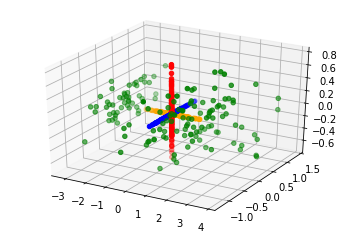

In [109]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(transformed[:,1], np.zeros(len(transformed[:,1])), np.zeros(len(transformed[:,1])), c = "orange") # (value, 0, 0)
ax.scatter(np.zeros(len(transformed[:,2])), transformed[:,2],np.zeros(len(transformed[:,2])), c = "blue") # (0, value, 0)
ax.scatter(np.zeros(len(transformed[:,2])), np.zeros(len(transformed[:,2])), transformed[:,2], c = "red") # (0, 0, value)
ax.scatter(transformed[:,0], transformed[:,1], transformed[:,2], c = 'g')

<br/><h2> <b> Split the dataset into training and testing data. </b> </h2><br/>

In [110]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.33, random_state = 46)
print(X_train.shape, X_test.shape)

(100, 4) (50, 4)


<br/><h2> <b> Convert original data of training and testing into PCA basis data. </b> </h2><br/>

In [111]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

(100, 3) (50, 3)


<br/><h2> <b> Apply Naive Bayes algorithm and calculate the accuracy of the model. </b> </h2><br/>

In [112]:
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

y_pred = gnb.predict(X_test_pca)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nPrecision: ",precision_score(y_test, y_pred, average = "weighted"))
print("\nRecall: ",recall_score(y_test, y_pred, average = "weighted"))

Accuracy:  0.9

Precision:  0.9010833333333333

Recall:  0.9


# Reducing the dimension of features from 4 to 2.

<br/><h2> <b> Making 2 principle components from 4 features. </b> </h2><br/>

In [113]:
pca = PCA(n_components = 2)

In [114]:
pca.fit(features)

PCA(n_components=2)

<br/><h2> <b> Calculating Eigenvectors and Eigenvalues. </b> </h2><br/>

In [115]:
print("Eigen Vectors:\n")
print(pca.components_)

print("\nEigen Values:\n")
print(pca.explained_variance_)

Eigen Vectors:

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]

Eigen Values:

[4.22824171 0.24267075]


<br/><h2> <b> Transform features to Principle components. </b> </h2><br/>

In [116]:
transformed = pca.transform(features)

# features should be reduced to 2 from 4.
transformed.shape

(150, 2)

<br/><h2> <b> Visualization of principle components in 2D. </b> </h2><br/>

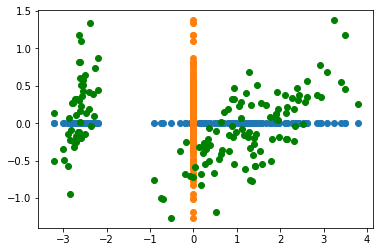

In [117]:
plt.scatter(transformed[:,0], np.zeros(len(transformed[:,0]))) # (value, 0)
plt.scatter(np.zeros(len(transformed[:,1])), transformed[:,1]) # (0, value)
plt.scatter(transformed[:,0], transformed[:,1], c = 'green')

<br/><h2> <b> Split the dataset into training and testing data. </b> </h2><br/>

In [118]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.33, random_state = 46)
print(X_train.shape, X_test.shape)

(100, 4) (50, 4)


<br/><h2> <b> Convert original data of training and testing into PCA basis data. </b> </h2><br/>

In [119]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)

(100, 2) (50, 2)


<br/><h2> <b> Apply Naive Bayes algorithm and calculate the accuracy of the model. </b> </h2><br/>

In [120]:
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

y_pred = gnb.predict(X_test_pca)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nPrecision: ",precision_score(y_test, y_pred, average = "weighted"))
print("\nRecall: ",recall_score(y_test, y_pred, average = "weighted"))

Accuracy:  0.88

Precision:  0.8827350427350428

Recall:  0.88


# Reducing the dimension of features from 4 to 2.

<br/><h2> <b> Making 1 principle components from 4 features. </b> </h2><br/>

In [121]:
pca = PCA(n_components = 1)

In [122]:
pca.fit(features)

PCA(n_components=1)

<br/><h2> <b> Calculating Eigenvectors and Eigenvalues. </b> </h2><br/>

In [123]:
print("Eigen Vectors:\n")
print(pca.components_)

print("\nEigen Values:\n")
print(pca.explained_variance_)

Eigen Vectors:

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]]

Eigen Values:

[4.22824171]


<br/><h2> <b> Transform features to Principle components. </b> </h2><br/>

In [124]:
transformed = pca.transform(features)

# features should be reduced to 1 from 4.
transformed.shape

(150, 1)

<br/><h2> <b> Visualization of principle components in 2D. </b> </h2><br/>

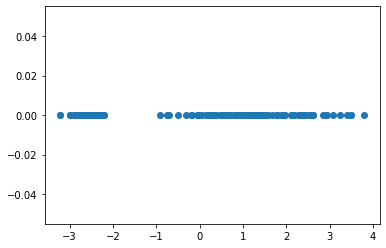

In [125]:
plt.scatter(transformed, np.zeros(len(transformed))) # (value, 0)

<br/><h2> <b> Split the dataset into training and testing data. </b> </h2><br/>

In [126]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.33, random_state = 46)
print(X_train.shape, X_test.shape)

(100, 4) (50, 4)


<br/><h2> <b> Convert original data of training and testing into PCA basis data. </b> </h2><br/>

In [127]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)

(100, 1) (50, 1)


<br/><h2> <b> Apply Naive Bayes algorithm and calculate the accuracy of the model. </b> </h2><br/>

In [128]:
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

y_pred = gnb.predict(X_test_pca)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nPrecision: ",precision_score(y_test, y_pred, average = "weighted"))
print("\nRecall: ",recall_score(y_test, y_pred, average = "weighted"))

Accuracy:  0.92

Precision:  0.92

Recall:  0.92


# Observations






1.   Accuracy when 3 Principle components = 90%
2.   Accuracy when 2 Principle components = 88% 
3.   Accuracy when 1 Principle components = 92%


<h1><b>By looking at the accuracies, we can conclude that accuracies are approximately remain same in all cases. So, instead of using all 4 features we can use only 1 feature to solve the problem. Hence, reduces the time and increases the processing speed.</b></h1>